In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_linnerud

In [3]:
data = load_linnerud()
X = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [19]:
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.01, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,100


In [20]:
predicted = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted)
mse

159.96666666666667

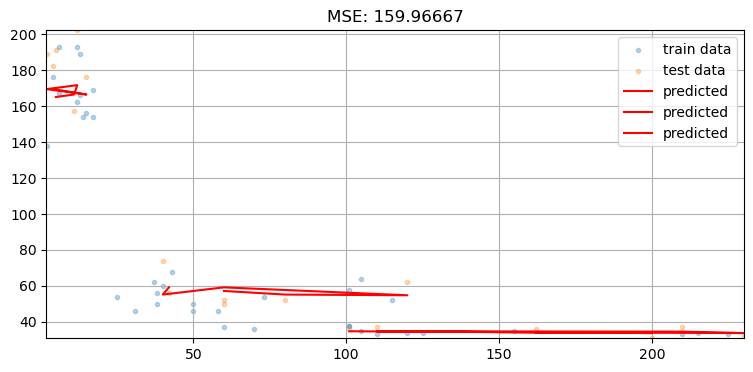

In [26]:
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(X_train, y_train, alpha=0.3, marker='.', label='train data')
ax.scatter(X_test, y_test, alpha=0.3, marker='.', label='test data')
ax.plot(X_test, predicted, 'r', label='predicted')
ax.set_title(f'MSE: {mse:.5f}')
ax.set_xlim(X_test.min() - 0.1, X_test.max() + 0.1)
ax.set_ylim(y_test.min() - 0.1, y_test.max() + 0.1)
ax.grid()
ax.legend()
plt.show()